In [50]:
# Dependencies
# Set up imports
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from pathlib import Path



In [51]:
# Import CSV
filepath = "Resources/student_health_data.csv"
df1 = pd.read_csv(filepath)

# Check it
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Heart_Rate                1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress_Level_Biosensor    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  Study_Hours               1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null   object 
dtypes: float6

In [52]:
#Reading file
df1.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


In [53]:
#statistical analysis on physical Activity with Sleep quality and Mood
df3 = df2[['Physical_Activity', 'Sleep_Quality']]
df_encoded = df3.apply(lambda x: pd.factorize(x)[0])
print(df_encoded)

     Physical_Activity  Sleep_Quality
0                    0              0
1                    1              1
2                    2              0
3                    0              2
4                    1              2
..                 ...            ...
995                  1              0
996                  0              2
997                  1              1
998                  2              2
999                  1              1

[1000 rows x 2 columns]


In [7]:
#Converting float to integer values
df2 = df1
# lets make integers
df2["Blood_Pressure_Systolic"] = df2["Blood_Pressure_Systolic"].astype("int")
df2["Heart_Rate"] = df2["Heart_Rate"].astype("int")
df2["Blood_Pressure_Diastolic"] = df2["Blood_Pressure_Diastolic"].astype("int")
df2["Stress_Level_Biosensor"] = df2["Stress_Level_Biosensor"].astype("int")
df2["Stress_Level_Self_Report"] = df2["Stress_Level_Self_Report"].astype("int")
df2["Study_Hours"] = df2["Study_Hours"].astype("int")
df2["Project_Hours"] = df2["Project_Hours"].astype("int")
df2.head(90)

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50,122,84,3,9,High,Moderate,Happy,34,16,Moderate
1,2,21,F,57,110,75,3,5,Moderate,Good,Stressed,16,15,Moderate
2,3,22,M,59,109,83,6,5,Low,Moderate,Happy,44,25,Moderate
3,4,24,M,76,125,78,6,6,High,Poor,Happy,21,20,High
4,5,20,M,68,107,80,7,4,Moderate,Poor,Happy,8,15,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,19,F,55,123,70,2,2,Moderate,Good,Neutral,35,16,Low
86,87,21,M,71,116,89,7,1,High,Good,Stressed,24,11,Moderate
87,88,23,M,74,138,90,5,8,Moderate,Good,Happy,17,19,Moderate
88,89,22,F,68,104,69,2,3,High,Moderate,Neutral,20,11,Low


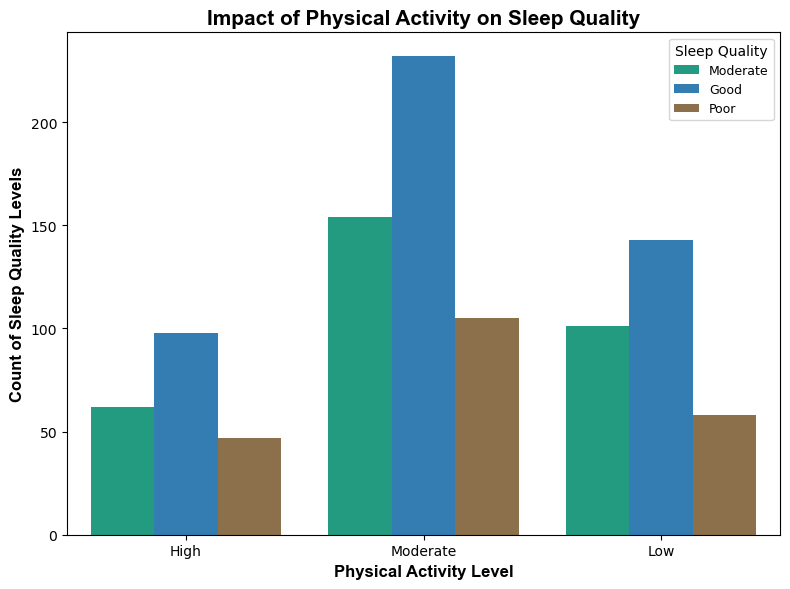

In [61]:
# Define a custom color palette for 'Sleep_Quality' categories
custom_palette = ["#0EAF8D", "#1E80C7", "#967240"]  

# Create the bar plot with the custom palette
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x="Physical_Activity", hue="Sleep_Quality", palette=custom_palette)

# Add titles and labels
plt.title("Impact of Physical Activity on Sleep Quality", family="Arial", fontsize=15, fontweight="bold")
plt.xlabel("Physical Activity Level", family="Arial", fontsize=12, fontweight="bold")
plt.ylabel("Count of Sleep Quality Levels", family="Arial", fontsize=12,fontweight="bold")

# Customize the legend
plt.legend(title="Sleep Quality", title_fontsize=10, loc="upper right", fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()

In [63]:
#statistical analysis on physical Activity with Sleep quality and Mood
df3 = df2[['Mood', 'Sleep_Quality']]
df_encoded = df3.apply(lambda x: pd.factorize(x)[0])
print(df_encoded)

     Mood  Sleep_Quality
0       0              0
1       1              1
2       0              0
3       0              2
4       0              2
..    ...            ...
995     1              0
996     0              2
997     0              1
998     2              2
999     0              1

[1000 rows x 2 columns]


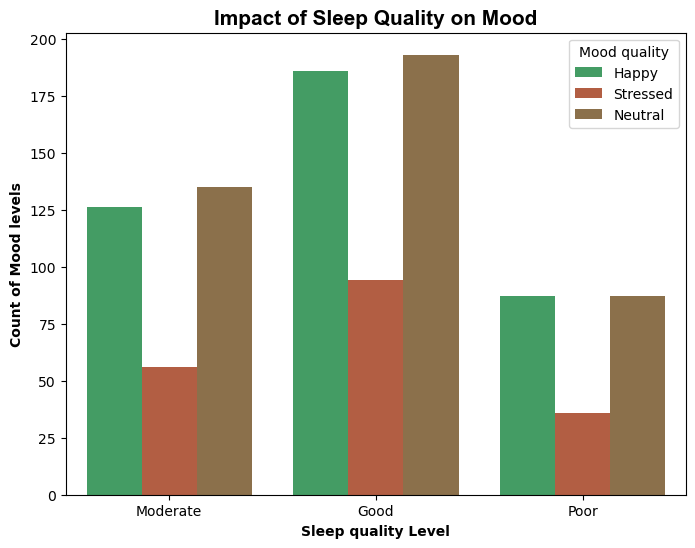

In [66]:
# Create a bar plot
plt.figure(figsize=(8, 6))
# Define a custom color palette for 'Sleep_Quality' categories
custom_palette = ["#36AA60", "#C55530", "#967240"]  
sns.countplot(data=df3, x="Sleep_Quality", hue="Mood",palette=custom_palette)
plt.title("Impact of Sleep Quality on Mood",family="Arial", fontsize=15,fontweight="bold")
plt.xlabel("Sleep quality Level", fontweight="bold")
plt.ylabel("Count of Mood levels", fontweight="bold")
plt.legend(title="Mood quality")
plt.show()

In [18]:
#statistical analysis on physical Activity with Sleep quality and Mood
df3 = df2[['Stress_Level_Biosensor', 'Sleep_Quality']]
df3.head(100)

,Stress_Level_Biosensor,Sleep_Quality
0,3,Moderate
1,3,Good
2,6,Moderate
3,6,Poor
4,7,Poor
...,...,...
95,9,Good
96,4,Moderate
97,5,Poor
98,9,Good


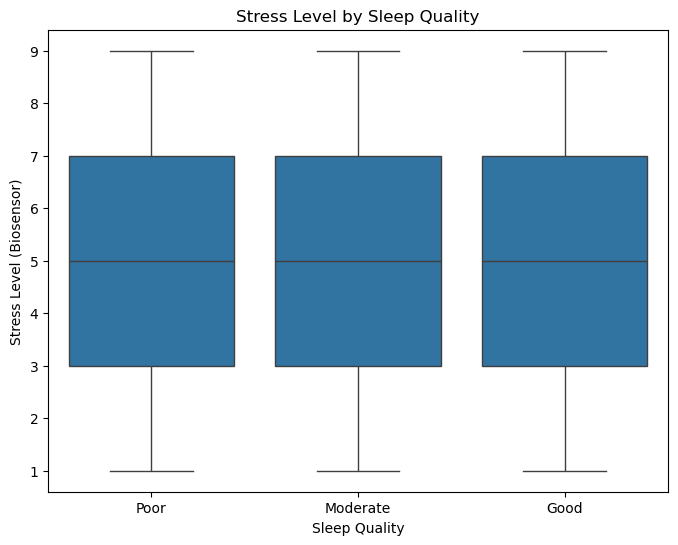

In [19]:
# Example DataFrame
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df3, x="Sleep_Quality", y="Stress_Level_Biosensor", order=["Poor", "Moderate", "Good"])
plt.title("Stress Level by Sleep Quality")
plt.xlabel("Sleep Quality")
plt.ylabel("Stress Level (Biosensor)")
plt.show()

In [21]:
df3[df3['Sleep_Quality']=='Good']['Stress_Level_Biosensor'].mean()

5.044397463002114

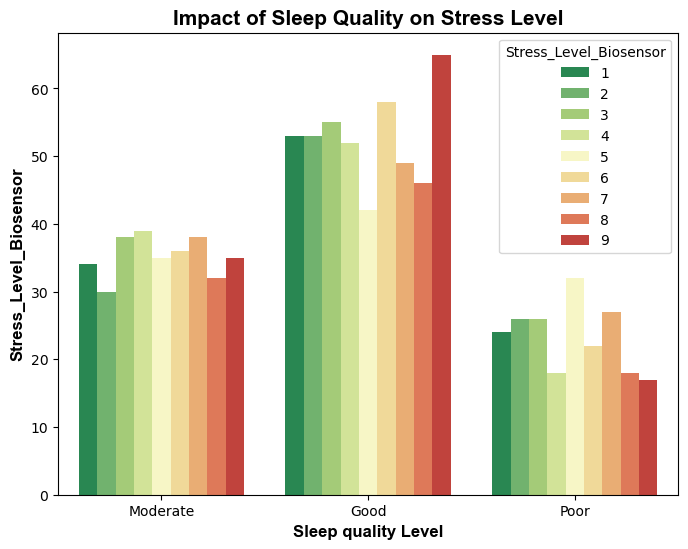

In [71]:

color_palette = sns.color_palette("RdYlGn_r", n_colors=len(df2["Stress_Level_Biosensor"].unique()))
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x="Sleep_Quality", hue="Stress_Level_Biosensor", palette = color_palette)
plt.title("Impact of Sleep Quality on Stress Level", family="Arial", fontsize=15,fontweight="bold")
plt.xlabel("Sleep quality Level",family="Arial", fontsize=12,fontweight="bold")
plt.ylabel("Stress_Level_Biosensor",family="Arial", fontsize=12,fontweight="bold")
plt.show()

In [26]:


# Define conditions for high and low blood pressure
def categorize_bp(row):
    if row["Blood_Pressure_Systolic"] >= 130 or row["Blood_Pressure_Diastolic"] >= 80:
        return "High BP"
    elif row["Blood_Pressure_Systolic"] <= 90 or row["Blood_Pressure_Diastolic"] <= 60:
        return "Low BP"
    else:
        return "Normal BP"

# Apply the function to categorize blood pressure
df2["Blood_Pressure_Category"] = df2.apply(categorize_bp, axis=1)

# Display the results
df2.head(100)

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level,Blood_Pressure_Category
0,1,24,M,50,122,84,3,9,High,Moderate,Happy,34,16,Moderate,High BP
1,2,21,F,57,110,75,3,5,Moderate,Good,Stressed,16,15,Moderate,Normal BP
2,3,22,M,59,109,83,6,5,Low,Moderate,Happy,44,25,Moderate,High BP
3,4,24,M,76,125,78,6,6,High,Poor,Happy,21,20,High,Normal BP
4,5,20,M,68,107,80,7,4,Moderate,Poor,Happy,8,15,Moderate,High BP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,23,F,71,92,68,9,4,High,Good,Neutral,32,13,Moderate,Normal BP
96,97,21,M,73,117,69,4,9,High,Moderate,Happy,33,16,Moderate,Normal BP
97,98,23,M,64,103,82,5,9,Moderate,Poor,Happy,31,10,Moderate,High BP
98,99,24,M,68,116,79,9,6,Low,Good,Neutral,30,13,Moderate,Normal BP
